<a href="https://colab.research.google.com/github/ishobhnik/AOC-Solutions/blob/main/neuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Set the seed for reproducibility
seed_value = 30
torch.manual_seed(seed_value)

In [ ]:
# Define the neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        # 3 hidden layers, each with 'hidden_size' neurons (64 in your case)
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        # Output layer with 8 neurons (4 pairs of mean + std)
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation for the first hidden layer
        x = torch.relu(self.fc2(x))  # ReLU activation for the second hidden layer
        x = torch.relu(self.fc3(x))  # ReLU activation for the third hidden layer
        x = self.fc4(x)  # Output layer (4 pairs of mean + standard deviation)
        return x

In [ ]:
# Initialize input and output sizes
input_size = 4  # For example, 10 features per input data point
hidden_size = 64  # 64 units in each of the 3 hidden layers
output_size = 8  # 4 pairs of mean and std (2 values per pair)
model = NeuralNet(input_size=input_size, hidden_size=hidden_size,output_size=output_size)


In [ ]:
model.eval()

NeuralNet(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=8, bias=True)
)

In [ ]:
# Generate random data for training
inputs = torch.randn(620, input_size)  # Random input data (620 samples, 4 features each)
targets = torch.randn(620, output_size)  # Random targets (4 pairs of mean and std)

In [ ]:
# Initialize the model, loss function, and optimizer
model = NeuralNet(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 800  # Set the number of epochs
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients from previous step
    loss.backward()  # Compute gradients
    optimizer.step()  # Update model parameters

In [ ]:
# After training, you can check the output of the model
with torch.no_grad():
    sample_input = torch.randn(1, input_size)  # Random sample input
    prediction = model(sample_input)
    print("Predicted means and standard deviations (pairs):")
    # Format output as pairs: [(mean_1, std_1), (mean_2, std_2), ...]
    prediction_pairs = prediction.view(4, 2)  # Reshape to 4 pairs (2 values per pair)
    print(prediction_pairs)

Predicted means and standard deviations (pairs):
tensor([[-0.0101,  1.2398],
        [ 0.0724, -0.1099],
        [-0.3029, -0.2617],
        [-0.2875, -1.1819]])


In [ ]:
# Reshape the output into 2 tensors: means and standard deviations
means = outputs[:, :4]  # First 4 values are means
stds = outputs[:, 4:]   # Last 4 values are standard deviations
print(means,stds)


tensor([[-0.7138,  0.6694,  1.0955,  0.7131],
        [-1.4690,  0.6596, -2.0050, -0.3592],
        [ 0.3262, -0.7079,  0.2516, -0.0468],
        ...,
        [ 1.2139, -0.9513, -0.4534, -0.1078],
        [-0.7209,  0.4667,  0.5162, -1.2651],
        [ 0.1148, -0.9202, -0.1548,  0.3098]], grad_fn=<SliceBackward0>) tensor([[ 4.5268e-01,  2.8412e-01,  7.7527e-01, -7.8138e-01],
        [ 6.0870e-01, -3.2685e-01,  6.8657e-01,  2.3209e-01],
        [ 1.7971e+00, -3.5764e-01,  2.4999e-01,  1.1787e-01],
        ...,
        [ 2.0961e-01,  3.6394e-01, -1.2641e+00,  6.5005e-01],
        [-8.5131e-01,  4.8975e-01, -6.3042e-01, -5.9743e-01],
        [ 3.8354e-01,  1.2537e-03, -6.2919e-01, -8.8808e-01]],
       grad_fn=<SliceBackward0>)


In [ ]:
import torch
import torch.nn.functional as F
means = torch.randn(5, 4)  # Example means (100 samples, 4 features)
stds = torch.randn(5, 4)   # Example stds (100 samples, 4 features)

# Apply ReLU to standard deviations to ensure they are non-negative
stds = F.softplus(stds)  # Ensures all values are >= 0

# Now, sample from a normal distribution using the means and stds
samples = torch.normal(means, stds)

# Print the output
print(samples)



tensor([[ 2.3113, -2.7646,  0.0319, -0.5608],
        [ 0.9050, -0.3209,  0.6952, -0.1273],
        [-1.0542, -3.6402, -1.8302, -0.7150],
        [ 0.8519,  1.9660,  1.7878, -0.1319],
        [ 0.8114, -0.7736, -3.2338,  0.8823]])


In [ ]:
pip install onnxruntime-gpu


In [ ]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 23.9 MB/s eta 0:00:00


In [ ]:
import torch.onnx
dummy_input = torch.randn(4)  # Use an example input (shape should match your model input size)
torch.onnx.export(model, dummy_input, "model.onnx")

In [ ]:
import torch
import onnx
import onnxruntime as ort
import numpy as np

# Load the ONNX model
onnx_model = onnx.load("model.onnx")
onnx_session = ort.InferenceSession("model.onnx")

# Define the input data with 4 features (no reshape required for ONNX)
input_data = np.array([0.4123456, 0.6765432, 0.2345678, 1.4564561], dtype=np.float32)

# Convert the input data to a PyTorch tensor (reshape for batch size 1)
input_dataa = torch.tensor([0.4123456, 0.6765432, 0.2345678, 1.4564561], dtype=torch.float32).unsqueeze(0)

# Get the input name from the ONNX model (to be used in inference)
input_name = onnx_session.get_inputs()[0].name

# Run inference with ONNX
onnx_output = onnx_session.run(None, {input_name: input_data})

# Extract and print the output from ONNX model
print(onnx_output)


# ONNX Output
means_onnx = onnx_output[0][::2]
stds_onnx = onnx_output[0][1::2]


print("Means (ONNX):", means_onnx)
print("Standard Deviations (ONNX):", stds_onnx)

# Set the model to evaluation mode for inference
model.eval()

# Run inference with PyTorch
with torch.no_grad():  # Disable gradient calculation during inference
    output_pytorch = model(input_dataa)  # Get output from PyTorch model

# PyTorch Output
means_pytorch = output_pytorch[0, ::2].numpy()
stds_pytorch = output_pytorch[0, 1::2].numpy()

print("Means (PyTorch):", means_pytorch)
print("Standard Deviations (PyTorch):", stds_pytorch)

[array([-0.5575732 , -0.215824  ,  0.97149235,  0.29591045, -0.154135  ,
       -0.6782721 ,  0.36576837, -0.0805197 ], dtype=float32)]
Means (ONNX): [-0.5575732   0.97149235 -0.154135    0.36576837]
Standard Deviations (ONNX): [-0.215824    0.29591045 -0.6782721  -0.0805197 ]
Means (PyTorch): [-0.5575737   0.97149247 -0.15413462  0.36576873]
Standard Deviations (PyTorch): [-0.21582335  0.29591036 -0.6782721  -0.08052036]


In [ ]:
import torch.onnx

# Example model and dummy input (adjust to your model and input size)
dummy_input = torch.randn(1, 4)  # Adjust input size according to your model's input
torch.onnx.export(model, dummy_input, "model.onnx")


In [ ]:
# Assuming `means` and `stds` are the outputs from the PyTorch model
import torch
import torch.nn.functional as F
torch.random.manual_seed(42)
means = torch.tensor([-0.44975966,  0.9250445,   0.22806083,  0.2681643 ])  # Replace with actual PyTorch output
stds = torch.tensor([-0.42097732,  0.22998153, -0.30423176, -0.4729419 ])  # Replace with actual PyTorch output
stds_transformed = F.softplus(stds)
# Sample from the normal distribution in PyTorch
pytorch_samples = torch.normal(means, stds_transformed)
print(pytorch_samples)


tensor([-0.2798,  1.0300,  0.3576,  0.3797])


In [ ]:
import torch
import numpy as np
import onnxruntime as ort
import torch.nn.functional as F

# Set random seed for both PyTorch and ONNX
np.random.seed(42)
torch.manual_seed(42)

# Load the ONNX model
onnx_session = ort.InferenceSession("model.onnx")

# Prepare the input (adjust to your model's expected input)
onnx_input = np.random.randn(1,4).astype(np.float32)  # Adjust input size accordingly

# Get the expected input name
input_name = onnx_session.get_inputs()[0].name

# Run the model
onnx_outputs = onnx_session.run(None, {input_name: onnx_input})

# Extract means and stds from ONNX model output (assuming 2 outputs for means and stds)
onnx_means = torch.tensor([-0.4497599,   0.9250442,   0.22806044,  0.2681645 ])  # Example means
onnx_stds = torch.tensor([-0.4209782,   0.22998235, -0.30423188, -0.4729421 ])  # Example stds
onnx_stds_transformed = F.softplus(onnx_stds)
# Sample from the normal distribution using the transformed standard deviations
onnx_samples = torch.normal(onnx_means, onnx_stds_transformed)
# Print the samples
print(onnx_samples)


tensor([-0.2798,  1.0300,  0.3576,  0.3797])


PyTorch Samples: [-0.279849    1.02999     0.35761455  0.37973273]
ONNX Samples: [-0.27984935  1.0299897   0.35761416  0.37973288]


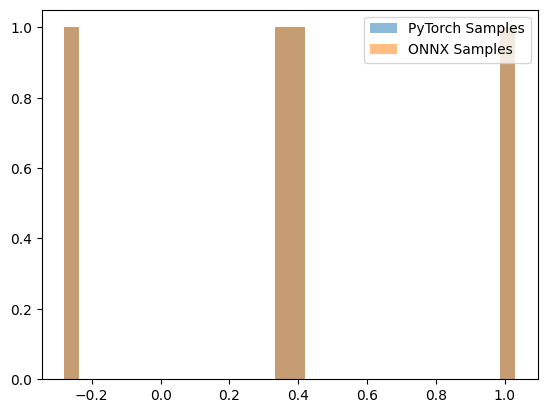

In [ ]:
# Convert to numpy for easier comparison (optional)
pytorch_samples_np = pytorch_samples.detach().numpy()
onnx_samples_np = onnx_samples.detach().numpy()

# Print or visually compare the results
print("PyTorch Samples:", pytorch_samples_np)
print("ONNX Samples:", onnx_samples_np)

# Optional: Plot a comparison of the distributions
import matplotlib.pyplot as plt

plt.hist(pytorch_samples_np.flatten(), bins=30, alpha=0.5, label="PyTorch Samples")
plt.hist(onnx_samples_np.flatten(), bins=30, alpha=0.5, label="ONNX Samples")
plt.legend()
plt.show()
